In [1]:
# for working with data
import numpy as np
import pandas as pd
import ast
import statsmodels.api as sm
import pylab as pl

# basic plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import table


# # import the things we need from bokeh
# from bokeh.plotting import figure, save, show
# from bokeh.io import output_file, output_notebook
# from bokeh.models import ColumnDataSource
# # from bokeh.charts import Bar
# from bokeh.models import HoverTool
# from bokeh.models import (
#   GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
# )
# from bokeh.tile_providers import STAMEN_TONER
# from bokeh.models import LinearColorMapper, ColorBar, BasicTicker, ContinuousColorMapper, ContinuousTicker
# from bokeh.palettes import Blues as bpalette

# display graphs within the notebook
%matplotlib inline
# output_notebook()

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
diversity= pd.read_csv('Silicon Valley Diversity.csv')

sanity check the csv dataframe

In [7]:
diversity.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Latino,male,Executive/Senior officials & Mgrs,0
1,23andMe,2016,Latino,male,First/Mid officials & Mgrs,1
2,23andMe,2016,Latino,male,Professionals,7
3,23andMe,2016,Latino,male,Technicians,0
4,23andMe,2016,Latino,male,Sales workers,0


In [8]:
diversity[diversity['job_category'].isin(['Previous_totals'])].head()

,company,year,race,gender,job_category,count
11,23andMe,2016,Latino,male,Previous_totals,na
23,23andMe,2016,Latino,female,Previous_totals,na
35,23andMe,2016,White,male,Previous_totals,na
47,23andMe,2016,Black_or_African_American,male,Previous_totals,na
59,23andMe,2016,Native_Hawaiian_or_Pacific_Islander,male,Previous_totals,na


Clean the NAs to 0s on the count column

In [9]:
diversity['count'].fillna(0, inplace=True)
print(diversity[diversity['count'].isin(['na'])].head())

    company  year                                 race  gender  \
11  23andMe  2016                               Latino    male   
23  23andMe  2016                               Latino  female   
35  23andMe  2016                                White    male   
47  23andMe  2016            Black_or_African_American    male   
59  23andMe  2016  Native_Hawaiian_or_Pacific_Islander    male   

       job_category count  
11  Previous_totals    na  
23  Previous_totals    na  
35  Previous_totals    na  
47  Previous_totals    na  
59  Previous_totals    na  


We still have counts with 'na's!

In [10]:
diversity['count'] = diversity['count'].replace(['na'], 0)
print(diversity[diversity['count'].isin(['na'])].head())

Empty DataFrame
Columns: [company, year, race, gender, job_category, count]
Index: []


In [12]:
# remove rows with Previous_totals and totals
diversity = diversity[diversity['job_category'] != 'Totals']
diversity = diversity[diversity['job_category'] != 'Previous_totals']

All cleaned! Finally!

In [13]:
diversity.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Latino,male,Executive/Senior officials & Mgrs,0
1,23andMe,2016,Latino,male,First/Mid officials & Mgrs,1
2,23andMe,2016,Latino,male,Professionals,7
3,23andMe,2016,Latino,male,Technicians,0
4,23andMe,2016,Latino,male,Sales workers,0


In [14]:
# make sure count column are floats
diversity['count'] = diversity['count'].astype(float)
grouped = diversity.groupby('race')
print(grouped.agg({
    'count': 'sum'}))

                                        count
race                                         
American_Indian_Alaskan_Native         1165.0
Asian                                 96171.0
Black_or_African_American             17832.0
Latino                                25767.0
Native_Hawaiian_or_Pacific_Islander    1146.0
Overall_totals                       354964.0
Two_or_more_races                      5871.0
White                                207012.0


In [15]:
pd.pivot_table(diversity, index=['race'], values='count', aggfunc=np.sum)

,count
race,
American_Indian_Alaskan_Native,1165.0
Asian,96171.0
Black_or_African_American,17832.0
Latino,25767.0
Native_Hawaiian_or_Pacific_Islander,1146.0
Overall_totals,354964.0
Two_or_more_races,5871.0
White,207012.0


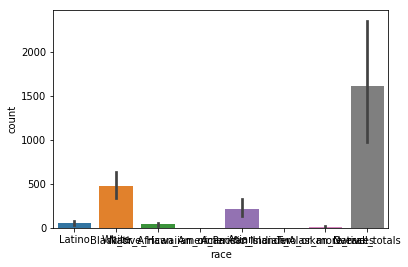

In [16]:
sns.barplot(y='count', x='race', data=diversity)
plt.show()

Overall_totals is messing things up! Let's build a new dataframe without it

In [17]:
race_count = pd.pivot_table(diversity, index=['race'], values='count', aggfunc=np.sum)
print(race_count)

                                        count
race                                         
American_Indian_Alaskan_Native         1165.0
Asian                                 96171.0
Black_or_African_American             17832.0
Latino                                25767.0
Native_Hawaiian_or_Pacific_Islander    1146.0
Overall_totals                       354964.0
Two_or_more_races                      5871.0
White                                207012.0


In [18]:
print(list(race_count))

['count']


In [19]:
print(race_count.shape)

(8, 1)


let's drop the 8th row

In [20]:
race_count.columns.name = 'XX'
print(race_count)

XX                                      count
race                                         
American_Indian_Alaskan_Native         1165.0
Asian                                 96171.0
Black_or_African_American             17832.0
Latino                                25767.0
Native_Hawaiian_or_Pacific_Islander    1146.0
Overall_totals                       354964.0
Two_or_more_races                      5871.0
White                                207012.0


In [21]:
print(race_count)

XX                                      count
race                                         
American_Indian_Alaskan_Native         1165.0
Asian                                 96171.0
Black_or_African_American             17832.0
Latino                                25767.0
Native_Hawaiian_or_Pacific_Islander    1146.0
Overall_totals                       354964.0
Two_or_more_races                      5871.0
White                                207012.0


In [29]:
race_count = race_count[race_count['count'] != 354964.0]

In [30]:
race_count

XX,count,race_type
race,,
American_Indian_Alaskan_Native,1165.0,American_Indian_Alaskan_Native
Asian,96171.0,Asian
Black_or_African_American,17832.0,Black_or_African_American
Latino,25767.0,Latino
Native_Hawaiian_or_Pacific_Islander,1146.0,Native_Hawaiian_or_Pacific_Islander
Two_or_more_races,5871.0,Two_or_more_races
White,207012.0,White


In [31]:
print(list(race_count.index))

['American_Indian_Alaskan_Native', 'Asian', 'Black_or_African_American', 'Latino', 'Native_Hawaiian_or_Pacific_Islander', 'Two_or_more_races', 'White']


In [32]:
race_count['race_type'] = list(race_count.index)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
race_count

XX,count,race_type
race,,
American_Indian_Alaskan_Native,1165.0,American_Indian_Alaskan_Native
Asian,96171.0,Asian
Black_or_African_American,17832.0,Black_or_African_American
Latino,25767.0,Latino
Native_Hawaiian_or_Pacific_Islander,1146.0,Native_Hawaiian_or_Pacific_Islander
Two_or_more_races,5871.0,Two_or_more_races
White,207012.0,White


Still ugly, let's do a pie chart

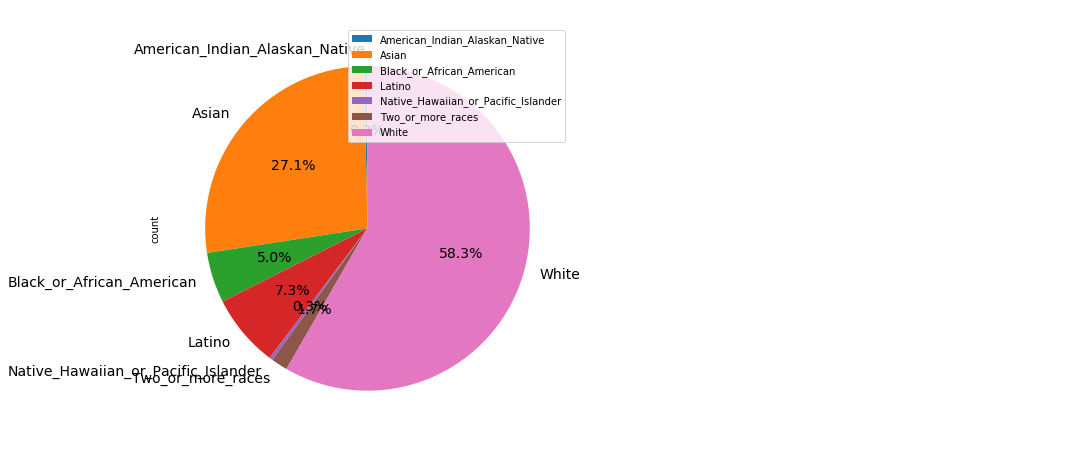

In [35]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
race_count.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=race_count['race_type'], legend = True, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
# tbl = table(ax2, race_count, loc='center')
# tbl.auto_set_font_size(False)
# tbl.set_fontsize(14)
plt.show()

##### To answer the first question: Are tech workers more likely to be white male? The answer is overwhelmingly yes.

gender2= pd.get_dummies(df['gender'], prefix='gender')

In [ ]:
baseline is ???

The topic is interesting and meaningful. For question1, how would you establish a baseline for comparison? You may need another dataset or some statistics that represent the “average” representation of white male workforce across industries so you can come to a conclusion about whether white male are “more likely” to be represented in tech. 

Find a baseline, find the aggregate stats in the dataframe, aggregate by white + male, and look at that as the categorization vs everything else

# let's just look at WHITE PEOPLE vs baseline instead

##### Are race and gender predictive of the job category in tech companies? What are the predictive magnitude of these variables?

For question2, do you plan on using machine learning for predictive analysis or using regression to test if those factors are statistically significantly related to the chance of being hired or just looking at the correlations? More specifically, what’s your methodology and what’s the outcome (positive/negative) you try to predict? Since there are many job categories, you are doing a multi-class classification rather than looking at a 1/0 binary outcome, which may be more challenging. 

Rollup gender, race to category into a pie chart (looking for charts and visuals so provide that)

In [68]:
# diversity['gender_dummy'] = pd.get_dummies(diversity['gender'], prefix='gender')
mapping = {}
for row in diversity.iterrows():
    # company, year, race, gender, job_category, count
    
    company = row[1][0]
    race = row[1][2]
    gender = row[1][3]
    job_category = row[1][4]
    count = row[1][5]
#     gender_dummy = row[6]
    if job_category in ['Overall_totals']:
        continue
    if job_category in mapping:
        if gender in mapping[job_category]:
            mapping[job_category][gender] += count
        else:
            mapping[job_category][gender] = count 
            
        if race in mapping[job_category]:
            mapping[job_category][race] += count
        else:
            mapping[job_category][race] = count     
    else:
        mapping[job_category] = {gender: count, race:count}
print(mapping)

{'Executive/Senior officials & Mgrs': {'male': 2738.0, 'Latino': 101.0, 'female': 798.0, 'White': 2620.0, 'Black_or_African_American': 55.0, 'Native_Hawaiian_or_Pacific_Islander': 5.0, 'Asian': 710.0, 'American_Indian_Alaskan_Native': 9.0, 'Two_or_more_races': 36.0, nan: 3536.0, 'Overall_totals': 3536.0}, 'First/Mid officials & Mgrs': {'male': 36366.0, 'Latino': 2690.0, 'female': 15670.0, 'White': 34517.0, 'Black_or_African_American': 1398.0, 'Native_Hawaiian_or_Pacific_Islander': 116.0, 'Asian': 12542.0, 'American_Indian_Alaskan_Native': 136.0, 'Two_or_more_races': 637.0, nan: 52036.0, 'Overall_totals': 52036.0}, 'Professionals': {'male': 146371.0, 'Latino': 10513.0, 'female': 57654.0, 'White': 108805.0, 'Black_or_African_American': 6495.0, 'Native_Hawaiian_or_Pacific_Islander': 539.0, 'Asian': 74350.0, 'American_Indian_Alaskan_Native': 525.0, 'Two_or_more_races': 2798.0, nan: 204025.0, 'Overall_totals': 204025.0}, 'Technicians': {'male': 24483.0, 'Latino': 4211.0, 'female': 7574.0, '

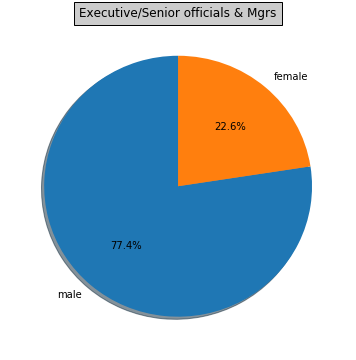

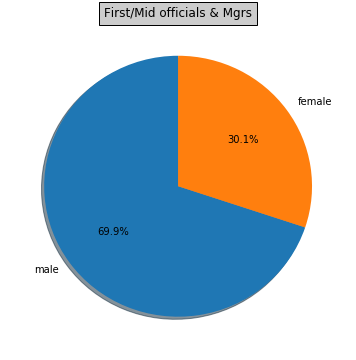

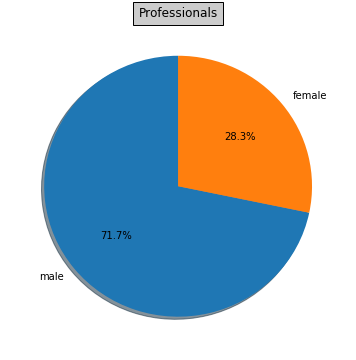

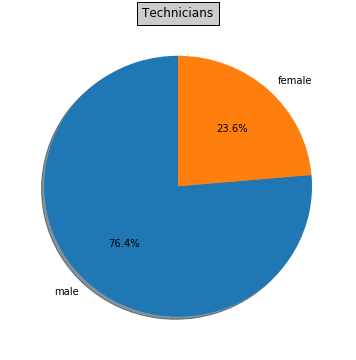

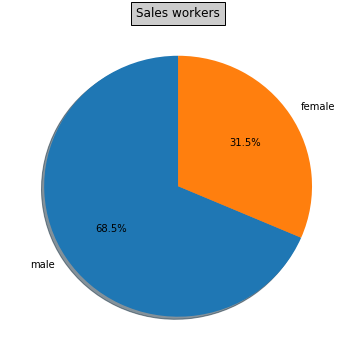

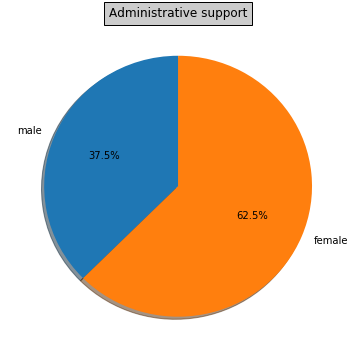

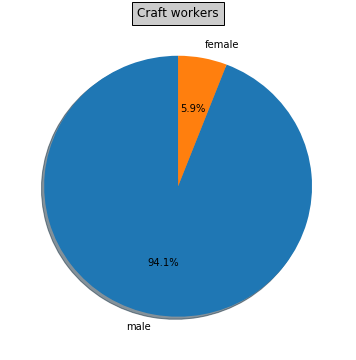

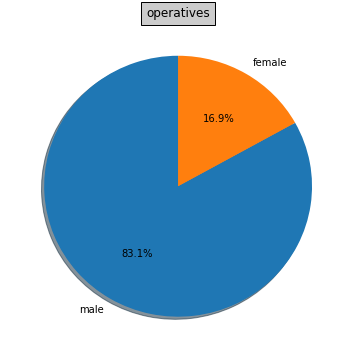

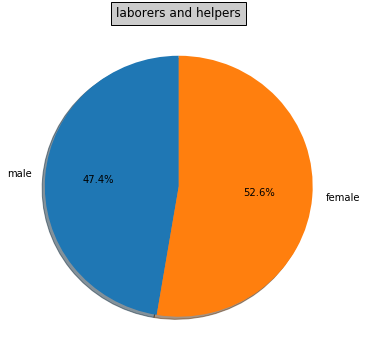

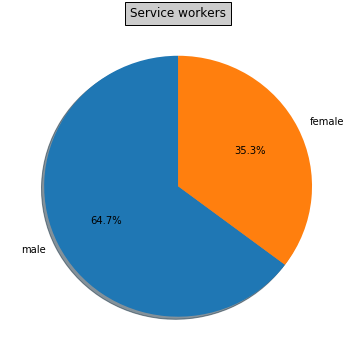

In [69]:
from pylab import *
for position in mapping:
    male = mapping[position]['male']
    female = mapping[position]['female']
    labels = 'male', 'female'
    sizes = [male, female]
    # Plot
    # make a square figure and axes
    figure(1, figsize=(6,6))
    #     ax = axes([0.1, 0.1, 0.8, 0.8])
    fracs = [male, female]
    pie(fracs, labels=labels,
                    autopct='%1.1f%%', shadow=True, startangle=90)
                    # The default startangle is 0, which would start
                    # the Frogs slice on the x-axis.  With startangle=90,
                    # everything is rotated counter-clockwise by 90 degrees,
                    # so the plotting starts on the positive y-axis.
    title(position, bbox={'facecolor':'0.8', 'pad':5})
    show()

In [87]:
males = []
females = []
positions = []

total_male = 0
total_female = 0 
for position in mapping:
    male = mapping[position]['male']
    female = mapping[position]['female']
    males.append(round(male / (male + female) * 100, 2))
    females.append(round(female / (male + female) * 100, 2))
    positions.append(position)
    total_male += male
    total_female += female
    
male_baseline = total_male / (total_female + total_male) * 100
female_baseline = total_female / (total_female + total_male) * 100

df = pd.DataFrame({
        'position' : positions,
        'male %' : males,
        'female %': females,
        'male deviation from baseline': [i - male_baseline for i in males] ,
        'female deviation from baseline': [i - female_baseline for i in females] ,
    })

In [88]:
print('Baseline for the Industry')
print('Male', str(round(total_male / (total_female + total_male) * 100, 2)) + '%')
print('Female', str(round(total_female / (total_female + total_male) * 100, 2)) + '%')

Baseline for the Industry
Male 69.76%
Female 30.24%


In [89]:
df.sort_values(by=['female deviation from baseline'])

,female %,female deviation from baseline,male %,male deviation from baseline,position
6,5.89,-24.353067,94.11,24.353067,Craft workers
7,16.92,-13.323067,83.08,13.323067,operatives
0,22.57,-7.673067,77.43,7.673067,Executive/Senior officials & Mgrs
3,23.63,-6.613067,76.37,6.613067,Technicians
2,28.26,-1.983067,71.74,1.983067,Professionals
1,30.11,-0.133067,69.89,0.133067,First/Mid officials & Mgrs
4,31.46,1.216933,68.54,-1.216933,Sales workers
9,35.29,5.046933,64.71,-5.046933,Service workers
8,52.63,22.386933,47.37,-22.386933,laborers and helpers
5,62.55,32.306933,37.45,-32.306933,Administrative support


The hypothesis is that for a given profession, the male-female distribution should be directly reflective of the baseline distribution of the dataset, which is 69.76% male and 30.24% female. We can see that there are more female workers than female workers with regards to baseline for services and administrative support, which is congruent with stereotypes. In addition, there are more male exectuives than female executives with regards to baseline, a well known phenomon. 

##### Do different companies have different diversity profile?

For question 3 and 4 you may discuss further on how you construct a diversity profile for each companies.

Diversity profile is gender + race

Our hypothesis is that different companies do have diffe

Let's check how many companies there are

In [136]:
print(np.unique(diversity[['company']].values))

['23andMe' 'Adobe' 'Airbnb' 'Apple' 'Cisco' 'Facebook' 'Google' 'HP Inc.'
 'HPE' 'Intel' 'Intuit' 'LinkedIn' 'Lyft' 'MobileIron' 'Nvidia' 'Pinterest'
 'Salesforce' 'Square' 'Twitter' 'Uber' 'View' 'eBay']


Let's build a new dataframe with some aggregate stats

In [153]:
mapping = {}

company_names = np.unique(diversity[['company']].values)
race = np.unique(diversity[['race']].values)
print(company_names)
print(race)

['23andMe' 'Adobe' 'Airbnb' 'Apple' 'Cisco' 'Facebook' 'Google' 'HP Inc.'
 'HPE' 'Intel' 'Intuit' 'LinkedIn' 'Lyft' 'MobileIron' 'Nvidia' 'Pinterest'
 'Salesforce' 'Square' 'Twitter' 'Uber' 'View' 'eBay']
['American_Indian_Alaskan_Native' 'Asian' 'Black_or_African_American'
 'Latino' 'Native_Hawaiian_or_Pacific_Islander' 'Overall_totals'
 'Two_or_more_races' 'White']


In [154]:
# Initializer
for company in company_names:
    mapping[company] = {}
    for r in race:
        mapping[company][r] = 0
    mapping[company]['male'] = 0
    mapping[company]['female'] = 0
    mapping[company]['other'] = 0    

In [168]:
for index, row in diversity.iterrows():
    company = row[0]
    race = row[2]
    gender = row[3]
    count = row[5]
    mapping[company][race] += count
    if gender == 'female':
        mapping[company]['female'] += 1
    elif gender == 'male':
        mapping[company]['male'] += 1
    else:
        mapping[company]['other'] += 1

In [169]:
print(mapping)

{'23andMe': {'American_Indian_Alaskan_Native': 8.0, 'Asian': 280.0, 'Black_or_African_American': 20.0, 'Latino': 76.0, 'Native_Hawaiian_or_Pacific_Islander': 4.0, 'Overall_totals': 1188.0, 'Two_or_more_races': 56.0, 'White': 744.0, 'male': 168, 'female': 180, 'other': 12}, 'Adobe': {'American_Indian_Alaskan_Native': 78.0, 'Asian': 10548.0, 'Black_or_African_American': 670.0, 'Latino': 1912.0, 'Native_Hawaiian_or_Pacific_Islander': 150.0, 'Overall_totals': 41810.0, 'Two_or_more_races': 390.0, 'White': 28062.0, 'male': 168, 'female': 180, 'other': 12}, 'Airbnb': {'American_Indian_Alaskan_Native': 24.0, 'Asian': 2958.0, 'Black_or_African_American': 304.0, 'Latino': 696.0, 'Native_Hawaiian_or_Pacific_Islander': 40.0, 'Overall_totals': 10470.0, 'Two_or_more_races': 342.0, 'White': 6106.0, 'male': 168, 'female': 180, 'other': 12}, 'Apple': {'American_Indian_Alaskan_Native': 1614.0, 'Asian': 85318.0, 'Black_or_African_American': 40836.0, 'Latino': 54924.0, 'Native_Hawaiian_or_Pacific_Islander

In [170]:
# build dataframe
headers = []
headers.append('company')
headers = headers + list(np.unique(diversity[['race']].values))
headers = headers + ['male', 'female', 'other']
print(headers)

['company', 'American_Indian_Alaskan_Native', 'Asian', 'Black_or_African_American', 'Latino', 'Native_Hawaiian_or_Pacific_Islander', 'Overall_totals', 'Two_or_more_races', 'White', 'male', 'female', 'other']


In [171]:
l = []
for k in mapping:
    line = [k]
    for k1 in mapping[k]:
        line.append(mapping[k][k1])
    l.append(line)
print(l)
        

[['23andMe', 8.0, 280.0, 20.0, 76.0, 4.0, 1188.0, 56.0, 744.0, 168, 180, 12], ['Adobe', 78.0, 10548.0, 670.0, 1912.0, 150.0, 41810.0, 390.0, 28062.0, 168, 180, 12], ['Airbnb', 24.0, 2958.0, 304.0, 696.0, 40.0, 10470.0, 342.0, 6106.0, 168, 180, 12], ['Apple', 1614.0, 85318.0, 40836.0, 54924.0, 2166.0, 453756.0, 9382.0, 259516.0, 168, 180, 12], ['Cisco', 552.0, 79896.0, 7584.0, 11288.0, 318.0, 222732.0, 2012.0, 121082.0, 168, 180, 12], ['Facebook', 104.0, 23388.0, 1326.0, 2738.0, 174.0, 61856.0, 1668.0, 32458.0, 168, 180, 12], ['Google', 324.0, 87118.0, 6160.0, 13204.0, 552.0, 264382.0, 4880.0, 152144.0, 168, 180, 12], ['HP Inc.', 864.0, 27320.0, 11740.0, 13512.0, 300.0, 198754.0, 2478.0, 142540.0, 168, 180, 12], ['HPE', 824.0, 26536.0, 14936.0, 11948.0, 320.0, 207956.0, 2308.0, 151084.0, 168, 180, 12], ['Intel', 1804.0, 112544.0, 12286.0, 26380.0, 1344.0, 324006.0, 3918.0, 165730.0, 168, 180, 12], ['Intuit', 372.0, 10612.0, 1446.0, 2642.0, 128.0, 36372.0, 812.0, 20360.0, 168, 180, 12], 

In [172]:
agg_diversity = pd.DataFrame(l, columns=headers)

In [173]:
print(agg_diversity)

       company  American_Indian_Alaskan_Native     Asian  \
0      23andMe                             8.0     280.0   
1        Adobe                            78.0   10548.0   
2       Airbnb                            24.0    2958.0   
3        Apple                          1614.0   85318.0   
4        Cisco                           552.0   79896.0   
5     Facebook                           104.0   23388.0   
6       Google                           324.0   87118.0   
7      HP Inc.                           864.0   27320.0   
8          HPE                           824.0   26536.0   
9        Intel                          1804.0  112544.0   
10      Intuit                           372.0   10612.0   
11    LinkedIn                            68.0   14492.0   
12        Lyft                            36.0    1314.0   
13  MobileIron                             6.0    1154.0   
14      Nvidia                            36.0   15996.0   
15   Pinterest                          

To see "differentness", let's look at the normalized SD score for each race to get an idea for the range of distributions 

In [191]:
for race in list(np.unique(diversity[['race']].values)):
    # the SD overall totals should be 0
    values = agg_diversity[race].values
    norm_vector = []
    # normalize
    for idx, v in enumerate(values):
        s = agg_diversity['Overall_totals'][idx]
        norm_vector.append(v/s) # normalize the count to the size of the company
    sd = np.std(norm_vector, axis=0)
    print(sd, ' is the normalized Standard Deviation for race ', race)

0.00213491101638  is the normalized Standard Deviation for race  American_Indian_Alaskan_Native
0.091721974964  is the normalized Standard Deviation for race  Asian
0.0303298524217  is the normalized Standard Deviation for race  Black_or_African_American
0.01895169521  is the normalized Standard Deviation for race  Latino
0.00109498855831  is the normalized Standard Deviation for race  Native_Hawaiian_or_Pacific_Islander
0.0  is the normalized Standard Deviation for race  Overall_totals
0.0113440900715  is the normalized Standard Deviation for race  Two_or_more_races
0.0693207657714  is the normalized Standard Deviation for race  White


Looks like there's some significant variations for the amount of Asians, Whites, and Black_or_African_American, but it quickly drops off from there. 

##### Do size of the company impact the diversity profile?

For question 3 and 4 you may discuss further on how you construct a diversity profile for each companies.

correlate gender race with size of company

For that, let's construct a baseline for the industry first

In [3]:
df = pd.DataFrame(diversity, columns = ['company', 'race', 'gender', 'job_category', 'count'])
df.replace(["NaN", 'na'], np.nan, inplace = True)
df= df.dropna()

In [99]:
count2=pd.to_numeric(df['count'])
df2=df.join(count2)
df2

ValueError: columns overlap but no suffix specified: Index(['count'], dtype='object')

In [103]:
sns.barplot(y='count2', x='race', data=df2)
plt.show()

ValueError: columns overlap but no suffix specified: Index(['count'], dtype='object')

In [87]:
count2=pd.to_numeric(df['count'])
type(count2)

pandas.core.series.Series

In [92]:
pd.pivot_table(df2, index=['race'], values='value', aggfunc=np.sum)

,value
race,
American_Indian_Alaskan_Native,0010000000100000100001033020000086024000000065...
Asian,0523003000031162500700003915310673011580000112...
Black_or_African_American,0020000000200200100003026250263000080740918055...
Latino,0170000000801500500001135175033800001701410506...
Native_Hawaiian_or_Pacific_Islander,0000000000001000000001159003000018190430000000...
Two_or_more_races,0040000000403200500001006250105000046280713057...
White,9306100200001027183700220000845611971325074296...


In [91]:
race2= pd.get_dummies(df['race'], prefix='race')
gender2= pd.get_dummies(df['gender'], prefix='gender')
company2= pd.get_dummies(df['company'], prefix='company')
category=pd.get_dummies(df['job_category'], prefix='job_category')
count2=pd.to_numeric(df['count'])


In [102]:
new_df=['race2','gender2','company2','category','count2']
new_df

['race2', 'gender2', 'company2', 'category', 'count2']

In [101]:
logit = sm.Logit(diversity3['count2'], diversity3['race2','gender2,'company2','category'])

result = logit.fit()


SyntaxError: invalid syntax (<ipython-input-101-1078fd51419e>, line 1)